# K-means Clustering: Intuitive Explanation

A01639224 | Fausto Alejandro Palma Cervantes

The notebook provides an intuitive description and explanation of the k-means clustering technique. A synthetic dataset will be used to identify clusters manually.

## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx

# Importing libraries

In [301]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing data

In [302]:
# Create synthetic data
d = {'x1': [2, 4, 2, 6, 6],
     'x2': [2, 3, 4, 6, 5]}

dataset = pd.DataFrame(data=d)

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data

In [303]:
dataset

,x1,x2
0,2,2
1,4,3
2,2,4
3,6,6
4,6,5


2. Scatter plot of the data

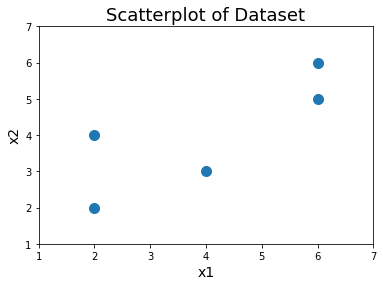

In [304]:
plt.scatter(dataset.x1, dataset.x2, s=100)
plt.title('Scatterplot of Dataset', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)

plt.xlim(1, 7)
plt.ylim(1, 7)

plt.show()

Note that for this dataset we don't know in advance the cluster/group/class each point belongs to. What we want to do is identify the existing clusters/groups/classes, i.e., in order to assing each point in the dataset to their corresponding cluster/group/class.

3. Preprocessing the data

No preprocessing is required

# Kmeans clustering

Intuitive explanation

### Initialize/Preliminaries

In [305]:
# Compute the number of points in the dataset
index = dataset.index
Npoints = len(index)

print(Npoints)

5


## 1: Specify the number of clusters

Define the number $K$ of clusters

In [306]:
# Let's assume our data has two clusters (note that the rest of the code is for K = 2)
K = 2

## 2: Initialize the centroids of the clusters

Randomly initialize the centroids of the clusters $C_1, C_2, \cdots, C_K$

In [307]:
# Let's initialize the centroids for the K = 2 clusters (this has to be done randomly)
C1 = np.array([1.5, 3.0]) # <- 1st centroid
C2 = np.array([3.0, 3.0]) # <- 2nd centroid

print(C1)
print(C2)

[1.5 3. ]
[3. 3.]


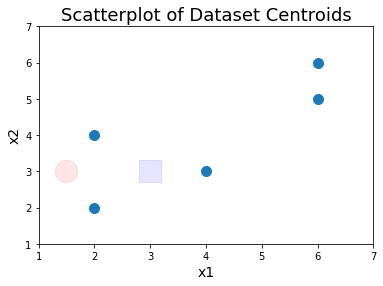

In [308]:
# Plot the points and the centroids
plt.scatter(dataset.x1, dataset.x2, s=100)
plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.1)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.1)
plt.title('Scatterplot of Dataset Centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)

plt.xlim(1, 7)
plt.ylim(1, 7)

plt.show()

## 3:  Repeat the following

Define the current centroids

In [332]:
# Use new centroids
C1 = C1new
C2 = C2new

print(C1)
print(C2)

[2.66666667 3.        ]
[6.  5.5]


## 4: Assign each point  to its closest centroid

Compute the distance of each data point to each centroid

Assign each point to the centroid with the minimum Euclidean distance

Euclidean distance:
- Consider the points $x=(x_1,x_2)$ and  $y=(y_1,y_2)$.
- The Euclidean distance between these two points is 
$ d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 } $

In [333]:
dataset

,x1,x2
0,2,2
1,4,3
2,2,4
3,6,6
4,6,5


In [334]:
# Compute the distance of each data point to each centroid
Dis2Centroids = np.zeros((Npoints, K))

# Let's compute the distance manually
ipoint, x1, x2 = 0, 2, 2 # See the data set
Dis2Centroids[ipoint, 0] = np.sqrt((x1 - C1[0])**2 + (x2 - C1[1])**2)
Dis2Centroids[ipoint, 1] = np.sqrt((x1 - C2[0])**2 + (x2 - C2[1])**2)

# Let's compute the distance manually
ipoint, x1, x2 = 1, 4, 3 # See the data set
Dis2Centroids[ipoint, 0] = np.sqrt((x1 - C1[0])**2 + (x2 - C1[1])**2)
Dis2Centroids[ipoint, 1] = np.sqrt((x1 - C2[0])**2 + (x2 - C2[1])**2)

# Let's compute the distance manually
ipoint, x1, x2 = 2, 2, 4 # See the data set
Dis2Centroids[ipoint, 0] = np.sqrt((x1 - C1[0])**2 + (x2 - C1[1])**2)
Dis2Centroids[ipoint, 1] = np.sqrt((x1 - C2[0])**2 + (x2 - C2[1])**2)

# Let's compute the distance manually
ipoint, x1, x2 = 3, 6, 6 # See the data set
Dis2Centroids[ipoint, 0] = np.sqrt((x1 - C1[0])**2 + (x2 - C1[1])**2)
Dis2Centroids[ipoint, 1] = np.sqrt((x1 - C2[0])**2 + (x2 - C2[1])**2)

# Let's compute the distance manually
ipoint, x1, x2 = 4, 6, 5 # See the data set
Dis2Centroids[ipoint, 0] = np.sqrt((x1 - C1[0])**2 + (x2 - C1[1])**2)
Dis2Centroids[ipoint, 1] = np.sqrt((x1 - C2[0])**2 + (x2 - C2[1])**2)

print(Dis2Centroids)

[[1.20185043 5.31507291]
 [1.33333333 3.20156212]
 [1.20185043 4.27200187]
 [4.48454135 0.5       ]
 [3.88730126 0.5       ]]


In [335]:
# Assign each point to the centroid with the minimum Euclidean distance
# cluster = np.array([1, 2, 1, 2, 2])
# cluster = np.array([1, 1, 1, 2, 2])
cluster = np.array([1, 1, 1, 2, 2])

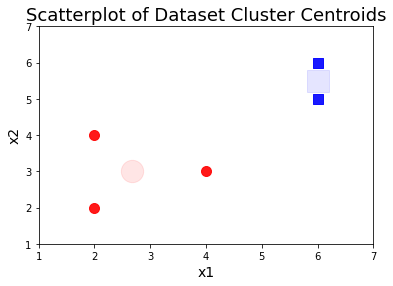

In [336]:
# Scatter plot of the data asigning each point to the cluster it belongs to
df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

plt.scatter(df1.x1, df1.x2, color='r', marker='o', s=100, alpha=0.9)
plt.scatter(df2.x1, df2.x2, color='b', marker='s', s=100, alpha=0.9)

plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.1)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.1)

plt.title('Scatterplot of Dataset Cluster Centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)

plt.xlim(1, 7)
plt.ylim(1, 7)

plt.show()

## 5: Compute the new centroid (mean) of each cluster

Compute the new centroid of each cluster

In [337]:
# Let's compute the 1st Centroid 
print(df1)

C1new = np.array([0., 0.])

C1new[0] = df1.x1.mean()
C1new[1] = df1.x2.mean()

print("\nNew C1 =", C1new)

   x1  x2
0   2   2
1   4   3
2   2   4

New C1 = [2.66666667 3.        ]


In [338]:
# Let's compute the 2nd Centroid 
print(df2)

C2new = np.array([0., 0.])

C2new[0] = df2.x1.mean()
C2new[1] = df2.x2.mean()

print("\nNew C2 =", C2new)

   x1  x2
3   6   6
4   6   5

New C2 = [6.  5.5]


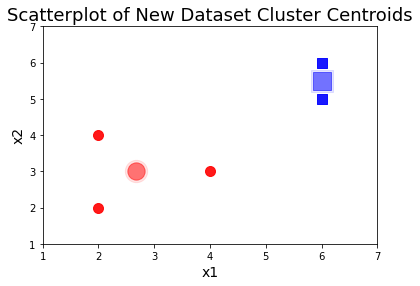

In [339]:
# Scatter plot of the data asigning each point to the cluster it belongs to
df1 = dataset[cluster==1]
df2 = dataset[cluster==2]

plt.scatter(df1.x1, df1.x2, color='r', marker='o', s=100, alpha=0.9)
plt.scatter(df2.x1, df2.x2, color='b', marker='s', s=100, alpha=0.9)

plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.1)
plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.1)

plt.scatter(C1new[0], C1new[1], color='r', marker='o', s=300, alpha=0.5)
plt.scatter(C2new[0], C2new[1], color='b', marker='s', s=300, alpha=0.5)

plt.title('Scatterplot of New Dataset Cluster Centroids', fontsize=18)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)

plt.xlim(1, 7)
plt.ylim(1, 7)

plt.show()

## 6: Until the centroids do not change 

If the centroids don't change then none of the data points of the assigned clusters change

In [340]:
print("    C1 =", C1)
print("New C1 =", C1new)

    C1 = [2.66666667 3.        ]
New C1 = [2.66666667 3.        ]


In [341]:
print("    C2 =", C2)
print("New C2 =", C2new)

    C2 = [6.  5.5]
New C2 = [6.  5.5]


#### If the centroids change: return to setop 3 (remember to use the new centroids)

#### If the centroids don't change: you're done

The centroids haven't changed: you're done


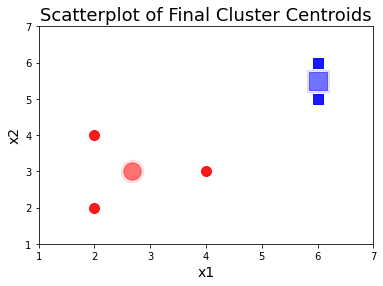

In [342]:
if (C1[0]!=C1new[0] or C1[1]!=C1new[1] or C2[0]!=C2new[0] or C2[1]!=C2new[1]):
    print("The centroids have changed: return to setp 3 with new centroids")
else:
    print("The centroids haven't changed: you're done")
    df1 = dataset[cluster==1]
    df2 = dataset[cluster==2]
    plt.scatter(df1.x1, df1.x2, color='r', marker='o', s=100, alpha=0.9)
    plt.scatter(df2.x1, df2.x2, color='b', marker='s', s=100, alpha=0.9)
    plt.scatter(C1[0], C1[1], color='r', marker='o', s=500, alpha=0.1)
    plt.scatter(C2[0], C2[1], color='b', marker='s', s=500, alpha=0.1)
    plt.scatter(C1new[0], C1new[1], color='r', marker='o', s=300, alpha=0.5)
    plt.scatter(C2new[0], C2new[1], color='b', marker='s', s=300, alpha=0.5)
    plt.title('Scatterplot of Final Cluster Centroids', fontsize=18)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.xlim(1, 7)
    plt.ylim(1, 7)
    plt.show()